In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

In [2]:
# def crop(img, ax0_min, ax0_max, ax1_min, ax1_max):
#     ax0_size = ax0_max - ax0_min
#     ax1_size = ax1_max - ax1_min
#     ax0_start = int(max(0, ax0_min - ax0_size*2))
#     ax1_start = int(max(0, ax1_min - ax1_size*2))
#     cropped = img[ax0_start: ax0_start + ax0_size *
#                   5, ax1_start: ax1_start + ax1_size*5]

In [3]:
filename = '../csv_detection_info/20_3, OCD.csv' # csv generert via auto_crop
filename_clean = '../csv_detection_info_clean/20_3, OCD.csv' # Filnavn på ny csv
saved_cropped_image = '//nmbu.no/LargeFile/Project/CubiAI/preprocess/cropped/20/3, OCD' # Beskjærte bilder via auto_crop

In [4]:
detection_df = pd.read_csv(filename)

In [5]:
detection_df

,base_path,filename,ax0_min,ax0_max,ax1_min,ax1_max,confidence,year,diagnosis,diagnosis_raw
0,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.840.114387.1342820679.18023.18529.40266.22...,570,716,482,627,0.999899,20,3,"3, OCD"
1,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.840.114387.1482215711.38800.18580.41833.26...,623,773,503,652,0.999034,20,3,"3, OCD"
2,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.840.114387.217916869.44036.19338.38137.274...,319,471,813,965,0.999999,20,3,"3, OCD"
3,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.840.114387.2814039458.24702.19614.34684.10...,506,659,457,609,0.999624,20,3,"3, OCD"
4,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.840.114387.973591977.40163.17696.47493.217...,436,586,700,851,0.999996,20,3,"3, OCD"
5,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.102876715.61373.34631.45630.49894.2...,760,948,1071,1259,0.999167,20,3,"3, OCD"
6,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.1148969843.54195.4934.35604.32374.4...,1121,1353,720,955,0.989177,20,3,"3, OCD"
7,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.12726431678.13560.32834.48497.12129...,271,401,368,498,0.999992,20,3,"3, OCD"
8,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.174306115.5298.60238.46580.43142.19...,765,924,867,1025,1.000000,20,3,"3, OCD"
9,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.2802249194.62460.59469.48403.40354....,610,847,1591,1827,0.975685,20,3,"3, OCD"


### [Optional] Sort by confidence (filter out bad prediction)

In [6]:
# detection_df = detection_df[detection_df.confidence > 0.5]

In [7]:
detection_df[detection_df.confidence < 0.5].index

Int64Index([], dtype='int64')

Note that there is one case that is not good

### Look at the crop images

Are they reasonable, if not, mark the "weird", "wrong detected" image indice before saving it back to the clean folder

In [8]:
# plot every 9 of them

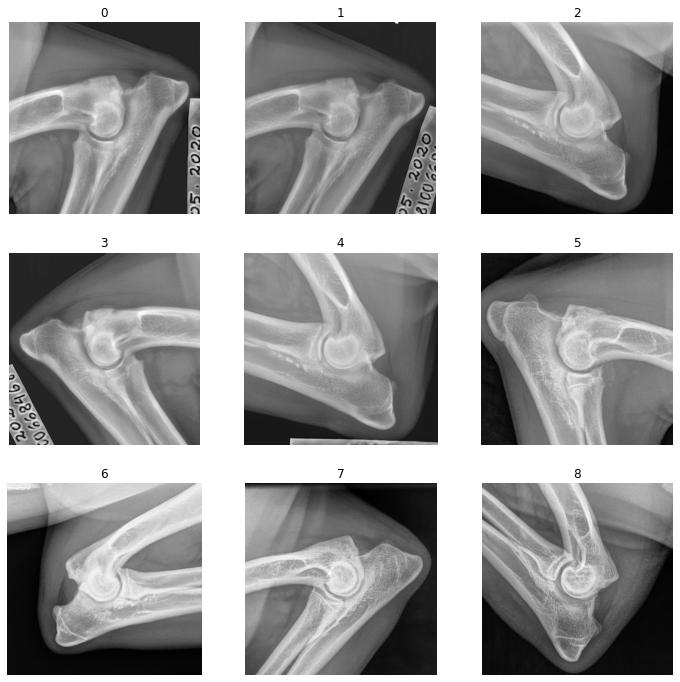

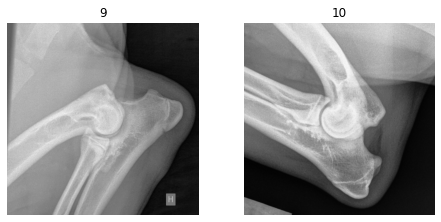

In [9]:
for id, item in detection_df.iterrows():
    fn = item['filename']
    img = np.load(saved_cropped_image + '/' + fn + '.npy')
    plt.subplot(3,3, (id%9) + 1)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title(str(id))
    
    if (id%9) == 8:
        plt.show()
        
plt.show()

## Remove bad detection items

In [10]:
# None in this case so we can save the csv to the clean folder
detection_df.to_csv(filename_clean, index=False)